In [1]:
#TASK 1
#1.Постройте точечный график.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('C:/Users/dinar/OneDrive/Documents/water.csv')
df = data

df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<Axes: xlabel='mortality', ylabel='location'>

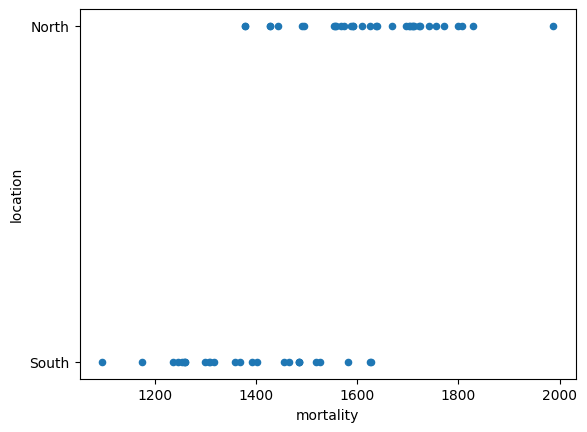

In [38]:
df.plot(kind='scatter', x='mortality', y='location')

In [39]:
#здесь мы видим, что смертность в северной части выше

<Axes: xlabel='hardness', ylabel='location'>

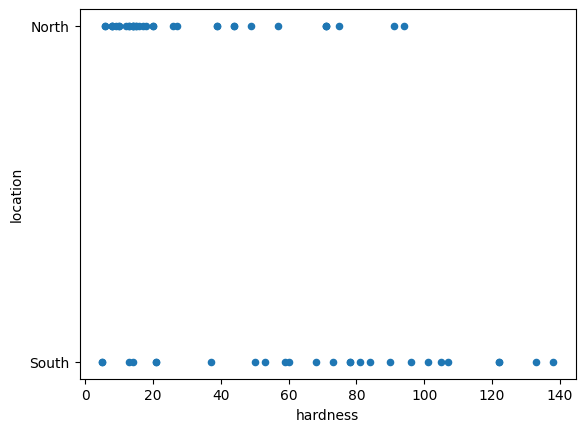

In [5]:
df.plot(kind='scatter', x='hardness', y='location')

In [6]:
# Исходя из данного графика видим, что в южной части вода жестче чем в северной

<Axes: xlabel='hardness', ylabel='mortality'>

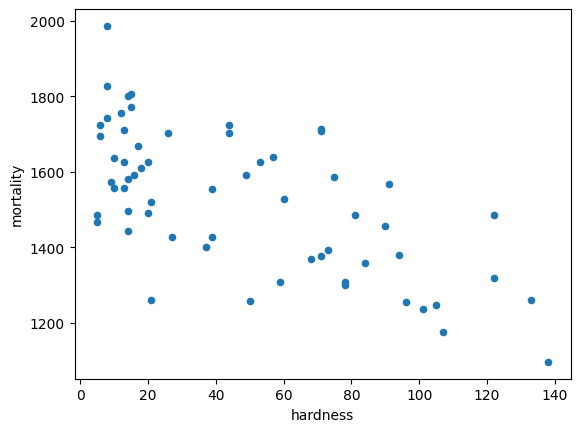

In [61]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [8]:
# Данный график позволяет увидеть, что чем больше жесткость тем меньше смертность 

In [9]:
#TASK 1
#2.Рассчитайте коэффициенты корреляции Пирсона и Спирмена.
# коэф. корреляции Пирсона (чувствительна к выбросам)
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:
# исходя из расчетов видим: что, чем больше жёсткость воды, тем ниже смертность. А также чем меньше жёсткость воды, тем выше смертность. Да, связь между жёсткостью воды и смертностью есть. 

In [11]:
# коэф. корреляции Спирмана (более устойчива к выбросам)
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [12]:
# значения не сильно поменялись, сохраняется общая тенденцмя. Чем выше жёсткость воды, тем ниже смертность. 

In [15]:
from sklearn.linear_model import LinearRegression #здесь используется для того чтобы подставить х и у и сделать предсказание, сделать уровнение и предсказание
from sklearn.model_selection import train_test_split #тут получается тестим и трениурем 

In [22]:
x = df[['hardness']]
y= df['mortality']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [24]:
x_train.shape

(42, 1)

In [25]:
x_test.shape

(19, 1)

In [26]:
y_train.shape

(42,)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train) #обучение и подбор коэф.

LinearRegression()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [29]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [31]:
#3 Рассчитайте коэффициент детерминации.
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

In [65]:
#КАК следует из коэф. детерминации, чем ближе результат к 1, то тем лучше регрессия объясняет зависимость данных. Значит зависимость есть

In [57]:
#5. Выведите график остатков.
residuals = y_test - y_pred

In [54]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

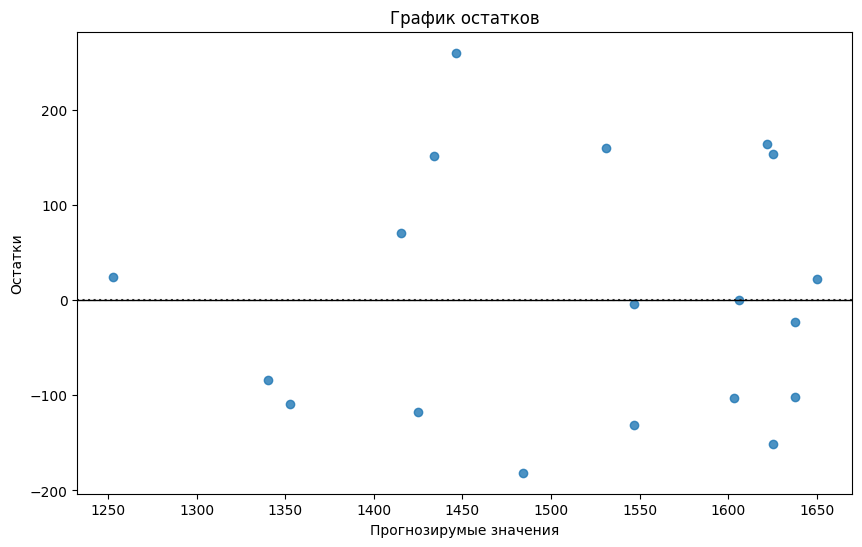

In [63]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, line_kws={"color": "red"})
plt.axhline(0, color='black', linestyle='-', linewidth=1) 
plt.title("График остатков")
plt.xlabel("Прогнозирумые значения")
plt.ylabel("Остатки")
plt.show()